<a href="https://colab.research.google.com/github/sarahcodebyte/SalaryPredictionModel/blob/main/SalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies

# **Import dependencies**

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# **Data processing and analysing**

In [2]:
salary_dataset = pd.read_csv("/content/salary - Sheet1.csv")

In [3]:
salary_dataset.head()

,Age,Education_num,Capital_gain,Hours_per_week,Income
0,49,13,1,59,>=50K
1,56,17,0,26,<=50k
2,46,5,0,74,>=50K
3,27,19,1,72,>=50K
4,44,10,1,57,>=50K


In [4]:
salary_dataset.replace({"Income": {"<=50k":0, ">=50K":1}}, inplace = True)
salary_dataset.head()

,Age,Education_num,Capital_gain,Hours_per_week,Income
0,49,13,1,59,1
1,56,17,0,26,0
2,46,5,0,74,1
3,27,19,1,72,1
4,44,10,1,57,1


# **Data Splitting**

In [8]:
X = salary_dataset.drop(columns = ['Income'], axis = 1)
Y = salary_dataset['Income']

print(X.head())
print(Y.head())

   Age  Education_num  Capital_gain  Hours_per_week
0   49             13             1              59
1   56             17             0              26
2   46              5             0              74
3   27             19             1              72
4   44             10             1              57
0    1
1    0
2    1
3    1
4    1
Name: Income, dtype: int64


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

# **Re-Scalling**

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train)

[[ 0.24475373 -1.22535609  1.09976641  0.2793327 ]
 [ 1.29030105  0.67016959 -0.909284    1.43078528]
 [ 1.14093715 -0.19143299 -0.909284    0.67983795]
 ...
 [ 0.17007178  0.15320804  1.09976641  1.1804695 ]
 [ 0.91689129 -0.88071505 -0.909284   -1.02230933]
 [-0.87547554 -0.88071505  1.09976641 -0.97224618]]


# **Finding K-value**

Text(0, 0.5, 'Mean Error')

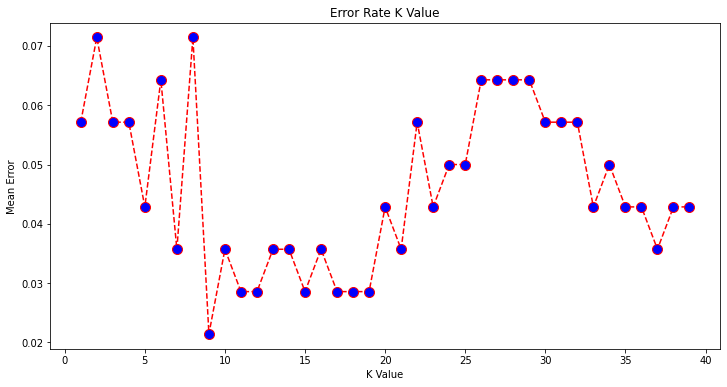

In [21]:
error = []
#alculating error values for values between 1 and 40
for i in range ( 1 , 40 ) :
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(X_train , Y_train)
  pred_i = model.predict(X_test)
  error.append(np.mean(pred_i != Y_test) )




plt.figure(figsize = (12 , 6))
plt.plot(range( 1 , 40 ) , error , color = 'red' , linestyle = 'dashed' , marker = 'o' ,
markerfacecolor = 'blue' , markersize = 10)
plt.title ('Error Rate K Value')
plt.xlabel ('K Value')
plt.ylabel ('Mean Error')

# **Training the model**

In [23]:
model = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9)

Predicting for all given data

In [24]:
X_train_prediction = model.predict(X_test)

# **Evaluating the model-CONFUSION MATRIX**

In [26]:
cm = confusion_matrix(Y_test, X_train_prediction)

print('Confusion matrix: ')
print(cm)

print('Accuracy of model: {0}%'.format(accuracy_score(Y_test, X_train_prediction)*100))

Confusion matrix: 
[[60  2]
 [ 1 77]]
Accuracy of model: 97.85714285714285%


# **Testing against custom input**

In [28]:
age = int(input('Enter Employees age: '))
edu_num = int(input('Enter Employees education: '))
cap_gain = int(input('Enter Employees capital gain: '))
work_hour = int(input('Enter Employees working hours: '))

newEmployee = [[age, edu_num, cap_gain, work_hour]]
result = model.predict(sc.transform(newEmployee))
print(result)

if result == 1:
  print("Employee might get salary >50K")
else:
  print("Employee might get salary <=50K")  

Enter Employees age: 22
Enter Employees education: 9
Enter Employees capital gain: 0
Enter Employees working hours: 62
[1]
Employee might get salary >50K


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
